In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("FC24-player_stats.csv")

In [3]:
# Focus on the top 50 players
top_50_players = df.head(50)
print(top_50_players)

                      player              country  height  weight  age  \
0   Cristian Castro Devenish             Colombia     192      84   22   
1           Silaldo Taffarel               Brazil     181      80   31   
2              Thomas DÃ¤hne              Germany     193      84   29   
3          Michael Sollbauer              Austria     187      86   33   
4              Diego Segovia              Uruguay     191      80   23   
5             ClÃ¡udio Ramos             Portugal     183      83   31   
6            CÃ©dric Zesiger          Switzerland     194      88   25   
7                Pedro Gomes             Portugal     185      75   20   
8           Famara DiÃ©dhiou              Senegal     189      80   30   
9               Sibiry Keita                 Mali     173      67   22   
10        Abdullah Al Hamdan         Saudi Arabia     186      78   23   
11          Patrick Lienhard              Germany     169      65   31   
12          Vilmer RÃ¶nnberg          

In [4]:
#Focusing on the top 50 players
summary_stats = top_50_players['value'].describe()

print("\nSummary Statistics for the Top 50 Players:")
print(summary_stats)
print("\nTop 50 Players:")
print(top_50_players[['player', 'value']])


Summary Statistics for the Top 50 Players:
count           50
unique          36
top       $475.00 
freq             3
Name: value, dtype: object

Top 50 Players:
                      player        value
0   Cristian Castro Devenish   $1.400.000
1           Silaldo Taffarel     $975.00 
2              Thomas DÃ¤hne   $1.100.000
3          Michael Sollbauer     $650.00 
4              Diego Segovia     $300.00 
5             ClÃ¡udio Ramos   $2.800.000
6            CÃ©dric Zesiger   $1.600.000
7                Pedro Gomes     $230.00 
8           Famara DiÃ©dhiou   $1.400.000
9               Sibiry Keita     $475.00 
10        Abdullah Al Hamdan     $475.00 
11          Patrick Lienhard     $375.00 
12          Vilmer RÃ¶nnberg     $140.00 
13                Prabir Das     $150.00 
14          Tyreece Campbell     $130.00 
15              John Souttar   $2.300.000
16         Xavier Chavalerin   $3.500.000
17            Kim Geon Woong     $400.00 
18            JÃ©rÃ©mie Broh     $950.

In [5]:
print(f"This dataset contains {df.shape[0]} samples with {df.shape[1]} columns.\n")

This dataset contains 5682 samples with 41 columns.



In [6]:
# Table 1: Data Types
data_types_table = pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes}).reset_index(drop=True)
print("Table 1: Data Types\n")
print(data_types_table)

Table 1: Data Types

       Column Name Data Type
0           player    object
1          country    object
2           height     int64
3           weight     int64
4              age     int64
5             club    object
6     ball_control     int64
7        dribbling     int64
8          marking    object
9     slide_tackle     int64
10    stand_tackle     int64
11      aggression     int64
12       reactions     int64
13    att_position     int64
14   interceptions     int64
15          vision     int64
16       composure     int64
17        crossing     int64
18      short_pass     int64
19       long_pass     int64
20    acceleration     int64
21         stamina     int64
22        strength     int64
23         balance     int64
24    sprint_speed     int64
25         agility     int64
26         jumping     int64
27         heading     int64
28      shot_power     int64
29       finishing     int64
30      long_shots     int64
31           curve     int64
32          fk_acc    

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n")
print(missing_values[missing_values > 0])


Missing Values:

marking    158
dtype: int64


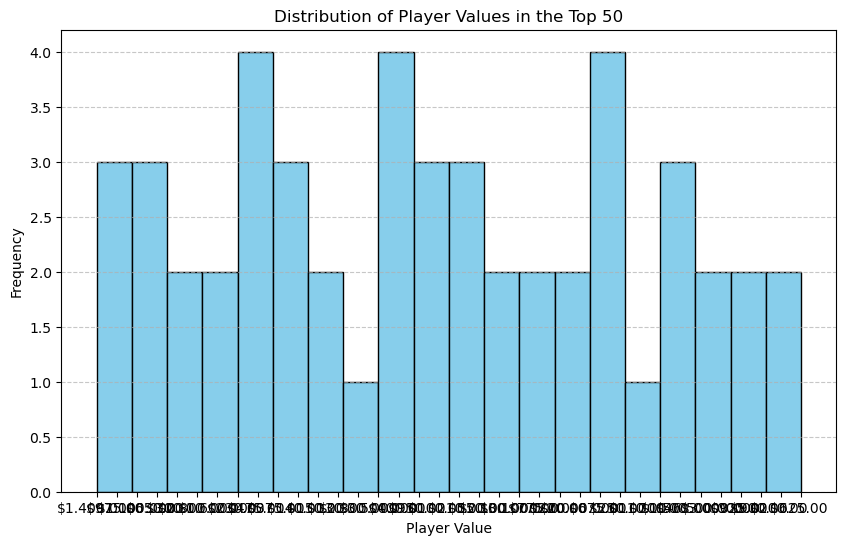

In [8]:
import matplotlib.pyplot as plt

# Assuming top_50_players is a pandas DataFrame with 'value' column
values = top_50_players['value']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Distribution of Player Values in the Top 50')
plt.xlabel('Player Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

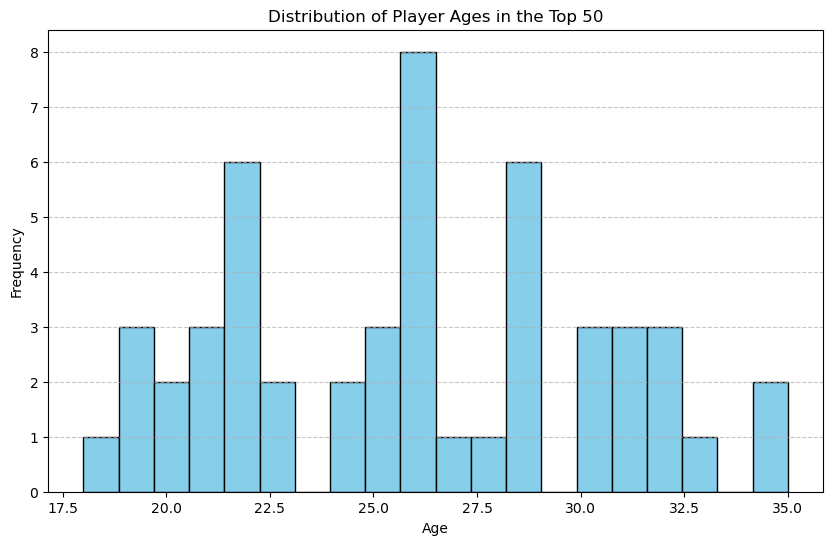

In [9]:
import matplotlib.pyplot as plt

# Assuming top_50_players is a pandas DataFrame with 'age' column
ages = top_50_players['age']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Player Ages in the Top 50')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

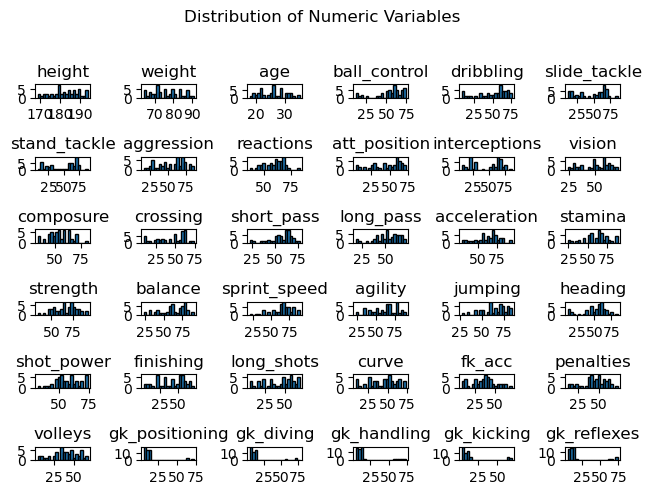

In [10]:
#Distribution of numeric variables
numeric_columns = top_50_players.select_dtypes(include=['int64']).columns

plt.figure(figsize=(14, 10))
top_50_players[numeric_columns].hist(bins=20, edgecolor='black', grid=False)
plt.suptitle('Distribution of Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()

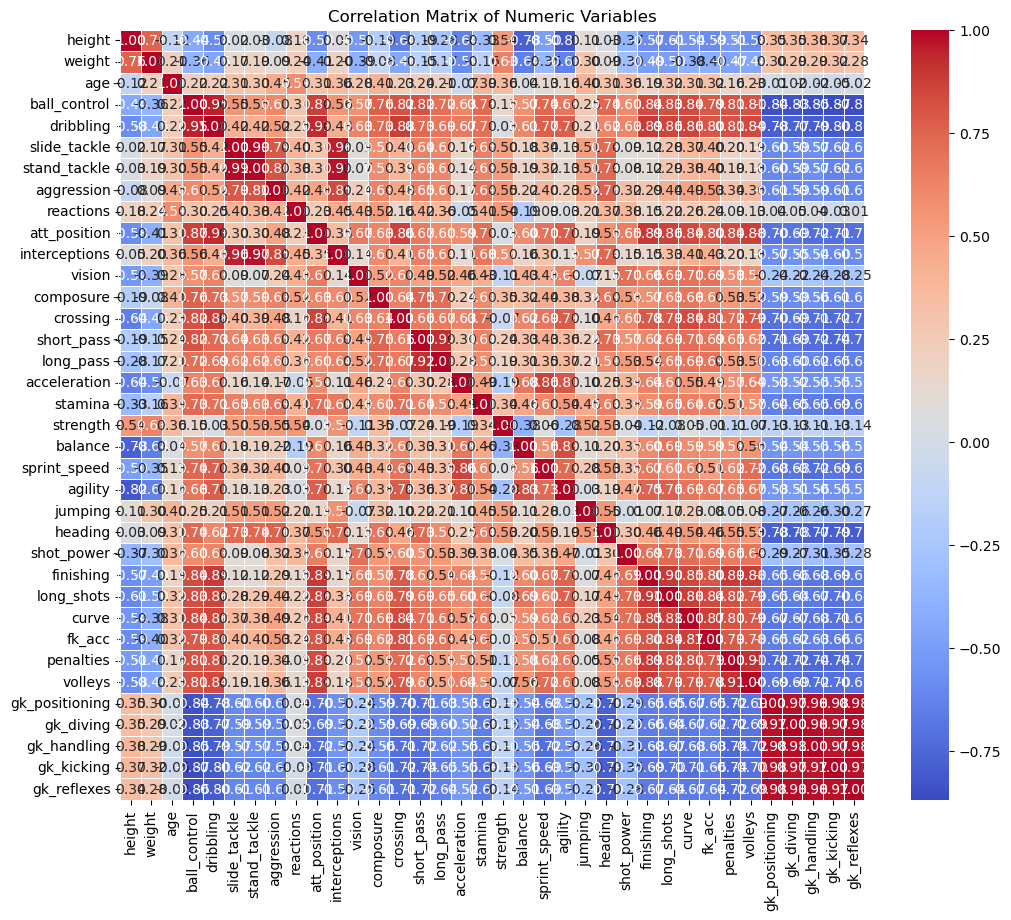

In [11]:
#Correlation Matrix
correlation_matrix = top_50_players[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

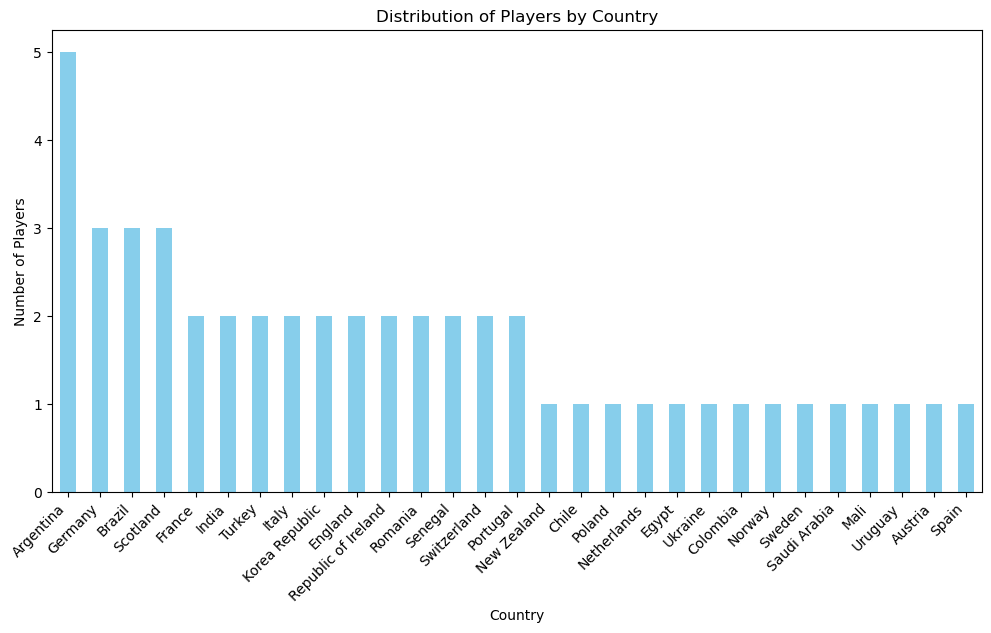

In [12]:
# Bar chart for a categorical variable (e.g., 'country')
plt.figure(figsize=(12, 6))
top_50_players['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Players by Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
top_50_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          50 non-null     object
 1   country         50 non-null     object
 2   height          50 non-null     int64 
 3   weight          50 non-null     int64 
 4   age             50 non-null     int64 
 5   club            50 non-null     object
 6   ball_control    50 non-null     int64 
 7   dribbling       50 non-null     int64 
 8   marking         0 non-null      object
 9   slide_tackle    50 non-null     int64 
 10  stand_tackle    50 non-null     int64 
 11  aggression      50 non-null     int64 
 12  reactions       50 non-null     int64 
 13  att_position    50 non-null     int64 
 14  interceptions   50 non-null     int64 
 15  vision          50 non-null     int64 
 16  composure       50 non-null     int64 
 17  crossing        50 non-null     int64 
 18  short_pass  

In [14]:
top_50_players.isnull().sum()

player             0
country            0
height             0
weight             0
age                0
club               0
ball_control       0
dribbling          0
marking           50
slide_tackle       0
stand_tackle       0
aggression         0
reactions          0
att_position       0
interceptions      0
vision             0
composure          0
crossing           0
short_pass         0
long_pass          0
acceleration       0
stamina            0
strength           0
balance            0
sprint_speed       0
agility            0
jumping            0
heading            0
shot_power         0
finishing          0
long_shots         0
curve              0
fk_acc             0
penalties          0
volleys            0
gk_positioning     0
gk_diving          0
gk_handling        0
gk_kicking         0
gk_reflexes        0
value              0
dtype: int64

In [15]:
top_50_players.columns

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'marking', 'slide_tackle', 'stand_tackle', 'aggression',
       'reactions', 'att_position', 'interceptions', 'vision', 'composure',
       'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina',
       'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

In [16]:
x = top_50_players[['height', 'weight', 'age', 'acceleration', 'stamina', 'strength', 'sprint_speed','agility','jumping' ]]
y = top_50_players['value']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

In [18]:
print(y_train.name)

value


In [21]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train.values,y_train)

LinearRegression()

In [22]:
y_pred=regressor.predict(x_test.values)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [24]:
y_test = pd.to_numeric(y_test.astype(str).replace('[$,]', '', regex=True).replace('.', '', regex=True), errors='coerce').fillna(0)

In [25]:
print(f"R-square: {r2_score(y_test,y_pred):.2f}")

R-square: 0.00


In [26]:
print(F"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

RMSE: 4178362.01
